In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("iris.data",header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [6]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
def nametonum(name):
    if name=='Iris-setosa':
        return int(1)
    elif name=='Iris-versicolor':
        return int(2)
    else:
        return int(3)

df["class"]=df["class"].map(nametonum)
df["class"].unique()

array([1, 2, 3])

array([[<AxesSubplot: title={'center': 'sepal_length'}>,
        <AxesSubplot: title={'center': 'sepal_width'}>],
       [<AxesSubplot: title={'center': 'petal_length'}>,
        <AxesSubplot: title={'center': 'petal_width'}>],
       [<AxesSubplot: title={'center': 'class'}>, <AxesSubplot: >]],
      dtype=object)

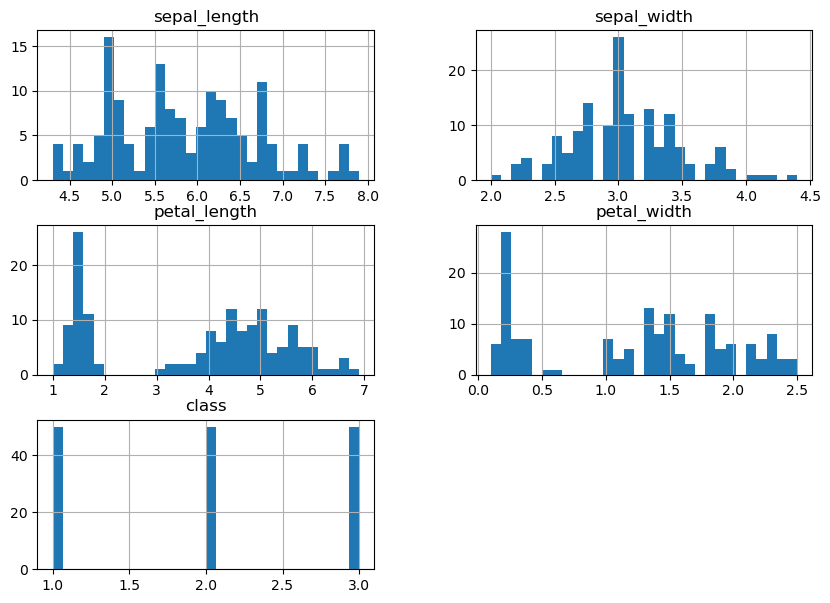

In [8]:
df.hist(bins=30,figsize=(10,7))

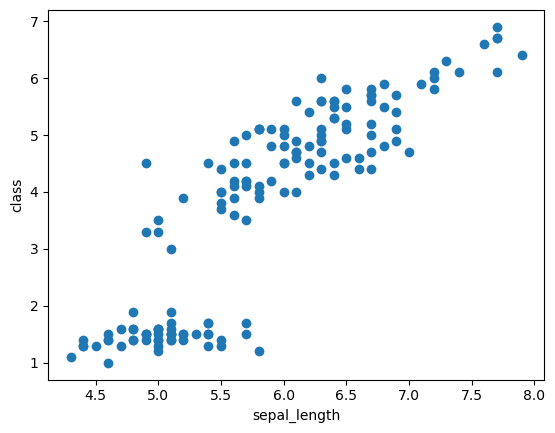

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel("sepal_length")
plt.ylabel("class")
plt.scatter(df["sepal_length"],df["petal_length"])

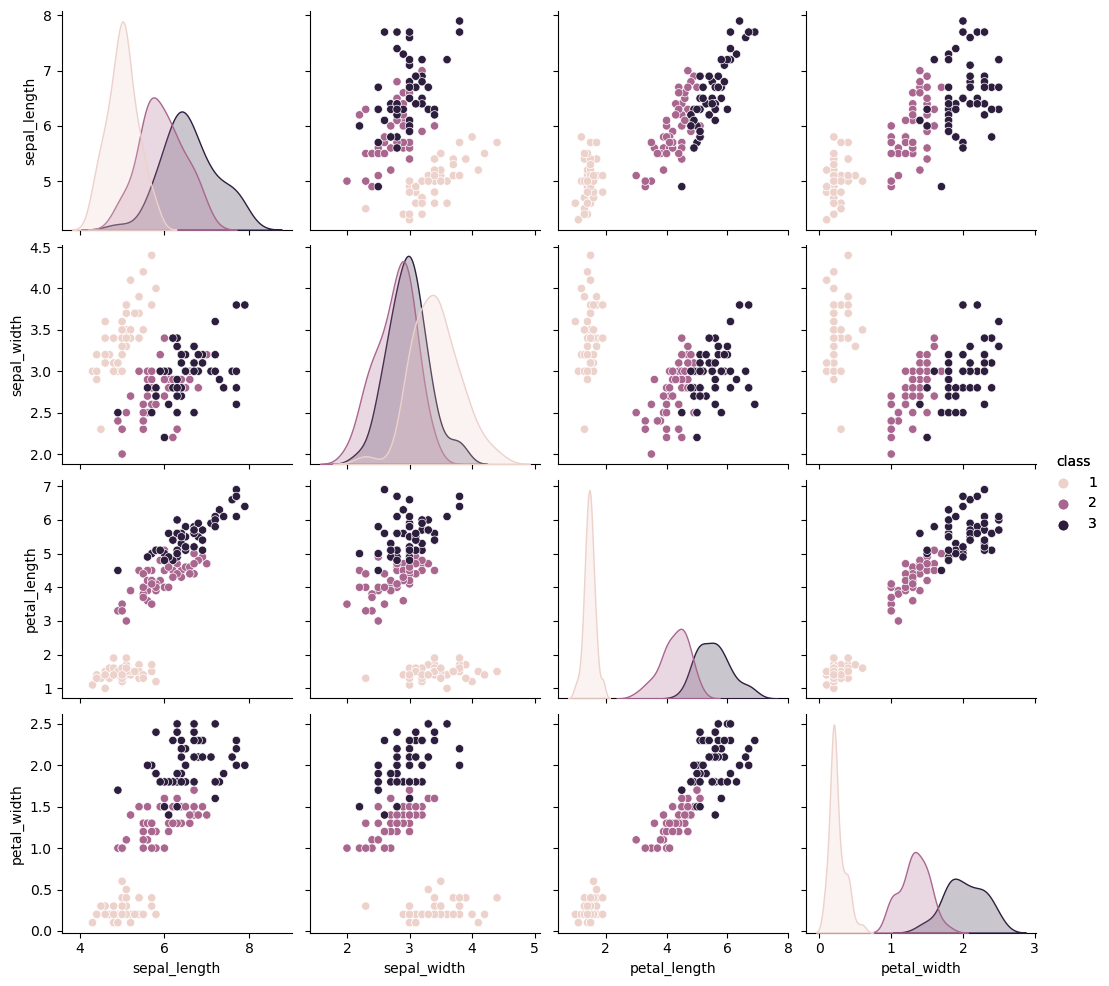

In [10]:
sns.pairplot(df,hue="class").add_legend()

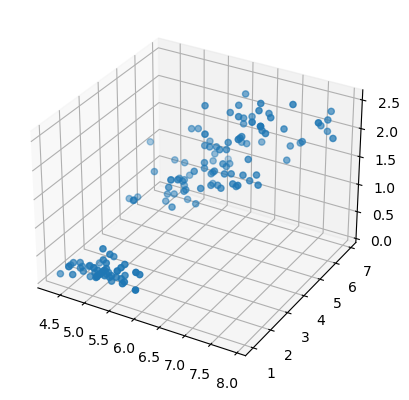

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(df["sepal_length"],df["petal_length"],df["petal_width"])
plt.show()

In [11]:
X=df.iloc[:,:-1]
y=df["class"]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(X_train,y_train)
r_pred=rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print("accuracy_score is",accuracy_score(y_test,r_pred))

accuracy_score is 0.9555555555555556


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)

knc.fit(X_train,y_train)
y_pred=knc.predict(X_test)

print("accuracy_score is",accuracy_score(y_test,y_pred))
y_pred

accuracy_score is 0.9777777777777777


array([1, 2, 2, 1, 3, 2, 3, 1, 1, 3, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 3, 2, 1, 1, 2, 3, 2, 3, 2, 3, 3, 1, 2, 1, 2, 3, 3, 1, 2, 3,
       2])

In [31]:
from sklearn.svm import SVC
svm=SVC()

svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)

print("accuracy_score is",accuracy_score(y_test,svm_pred))

accuracy_score is 0.9777777777777777


In [32]:
from sklearn.linear_model import LogisticRegression
mod1=LogisticRegression(max_iter=300)

mod1.fit(X_train,y_train)
y_pred1=mod1.predict(X_test)
print("accuracy_score is",accuracy_score(y_test,y_pred1))

accuracy_score is 0.9777777777777777
